In [1]:
# Teo Tze Shuen
# S10204885
# Diploma in Accountancy
# TA24

In [2]:
# TODO - project requirements
# 1.    Create non-visual or visual plots to inspect each categorical and numeric field.
# 2.    Identify potential data quality issues including data types.
# 3.	Clean up the data for the issues identified.
# 4.	Perform further data exploration on the cleaned data to uncover any interesting insight(s) using any two visual plots of your choice. (1/2)

#5. check that it all works on google colab

# IDEAS in progress: 

In [3]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# other misc stuff related to libraries
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(9,6)})

In [5]:
# to plot
#0   user_id         151112 non-null  int64  
#1   purchase_value  151112 non-null  int64  /
#2   device_id       151112 non-null  object 
#3   source          151112 non-null  object /
#4   browser         151112 non-null  object / (remove not_captured)
#5   sex             151112 non-null  object /
#6   age             144546 non-null  float64 / (remove missing values)
#7   ip_address      151112 non-null  float64
#8   days            151112 non-null  int64  /
#9   is_fraud        151112 non-null  int64 /

In [6]:
df = pd.read_excel('Fraud_Data_Final.xlsx')
df.info() 
# first, we check that the data imports sucessfully & get info on the data (to spot any glaring errors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             144546 non-null  float64
 7   ip_address      151112 non-null  float64
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


<AxesSubplot:xlabel='purchase_value', ylabel='Count'>

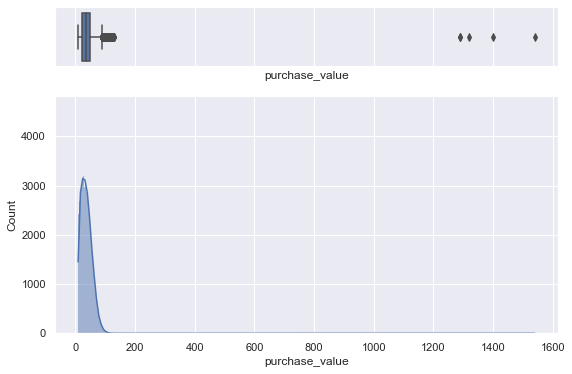

In [7]:
#plot a histogram & boxplot to see the distribution and quartiles of the purchase values.
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.20, 0.80)})

sns.boxplot(data=df, x='purchase_value', ax=ax_box)
sns.histplot(data=df, x='purchase_value', ax=ax_hist, kde=True)

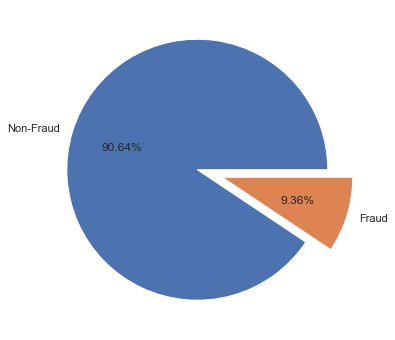

In [8]:
# massive outliers here - dictionary says value should be capped at 400, so we will hard cap the value at that and remove outliers.
# we can clean the data later in the 'cleaned' dataset, with the condition to remove rows in which purchase value is over 400.
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value

# The most notable data is the is_fraud value, which will help us with our data exploration later
# Draw piechart to determine percentage of fraud cases in dataset
explode = (0, 0.2) #explode second slice
labels = 'Non-Fraud', 'Fraud'
figure1, ax1 = plt.subplots()

ax1.pie(df.is_fraud.value_counts(), explode=explode, autopct='%.2f%%', labels=labels) # pie charts, to 2dp
plt.show()

In [9]:
# Around 9.36% of cases are fraud in the raw data.

<AxesSubplot:xlabel='browser', ylabel='count'>

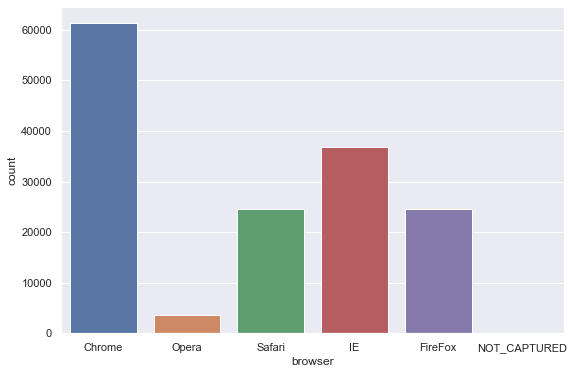

In [10]:
# plot a to figure out the distribution of browser users
sns.countplot(data=df, x='browser')


In [11]:
# doesn't seem too interesting, althugh there is the 'not_captured' column of missing value - we can remove it later as it can be considered a missing value

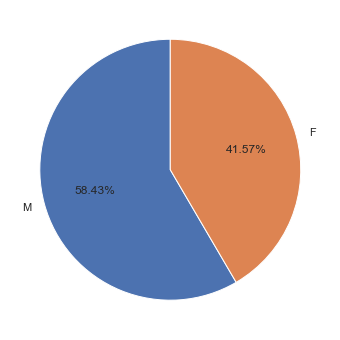

In [12]:
# we can plot the 'sex' data into a piechart to see the distribution of sexes
labels2 = 'M', 'F'
figure1, ax1 = plt.subplots()

ax1.pie(df.sex.value_counts(), autopct='%.2f%%', labels=labels2, startangle=90) # pie charts, to 2dp
plt.show()

In [13]:
# More males than females, no other values.

q1=26.0, q3=39.0, median=32.0, IQR=13.0, UppFence=58.5,LwrFence=6.5


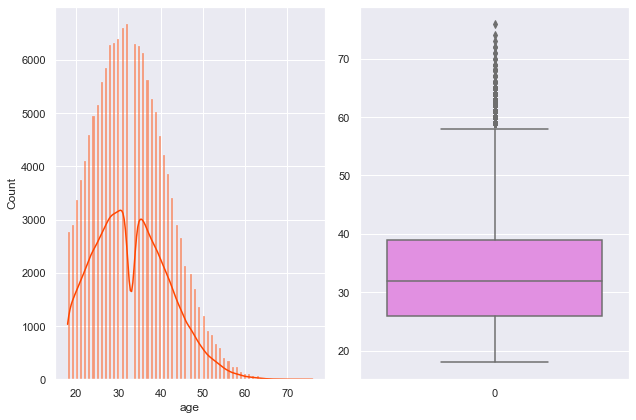

In [14]:
# age graphs
# calculating fences
q1= df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
median = df['age'].median()
IQR = q3 - q1
UppFence = q3 + 1.5*IQR
LwrFence = q1 - 1.5*IQR
print("q1={}, q3={}, median={}, IQR={}, UppFence={},LwrFence={}".format(q1,q3,median,IQR,UppFence,LwrFence))

fig, ax = plt.subplots(1,2)
sns.histplot(df['age'], kde=True, color='orangered', ax=ax[0])
sns.boxplot(data=df['age'], ax=ax[1], color='violet')
plt.tight_layout()

In [15]:
# Interesting, seems like an entire age band is missing. We can clean that up later - other than that, looks like a fairly typical distribution.
# while the boxplot shows that there are values outside the upperfence, they are realistic so I will not remove them.

<AxesSubplot:xlabel='source', ylabel='count'>

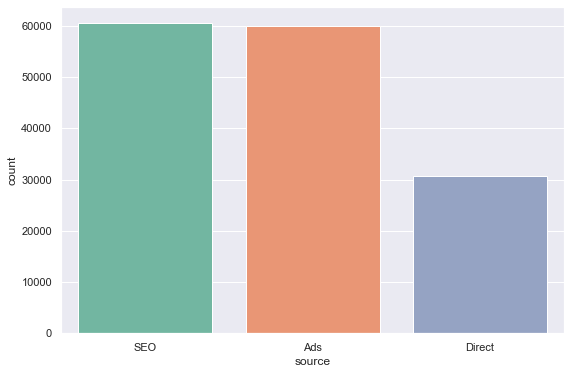

In [16]:
# Plot a countplot to see the source of the purchases
sns.countplot(data=df, x='source', palette="Set2")

In [17]:
# Nothing odd, ads and SEO have about the same count. It may be possible that the fraud purchases are direct (keep in view)

<AxesSubplot:xlabel='days', ylabel='Count'>

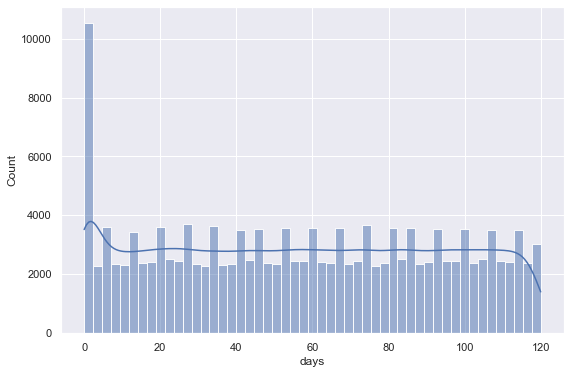

In [18]:
# Plot a histogram to see the distribution of days
sns.histplot(df['days'], kde=True)

In [19]:
# Interesting, there is a spike on day 0 but after that the smoothed value remains almost constant. No glaring missing values.

<AxesSubplot:>

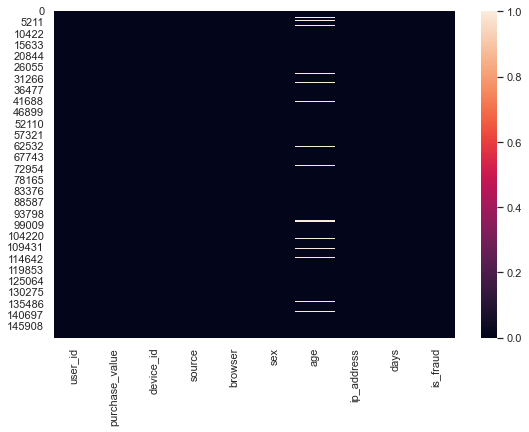

In [20]:
# We can use a heatmap to check for mussing values, by plotting the .isnull() values of all the columns into a heatmap
# white bars would represent null values
sns.heatmap(data=df.isnull())

In [21]:
# Lastly, we use .head to inspect the values which are not needed for visual plotting (ip_address, user_id, purchase_id) 
# and to do a non- visual inspection and correct any wrong datatypes.
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,days,is_fraud
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,52,0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0,0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,0,1
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,6,0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,50,0


In [22]:
# Cleaning of data

# First, make a copy of the dataframe so we do not overwrite it
df_clean = df.copy()
# next, we drop rows with missing values
df_clean = df_clean.dropna(axis=0, how='any') 
# We can remove duplicate rows with .drop_duplicates
df_clean = df_clean.drop_duplicates()

# Datatype Fixing

# user_id is for identification purposes are not meant for calculation, so we should convert it into a string
df_clean = df_clean.astype({'user_id':'str'})

# purchase value is meant for calculations, so interger is a good datatype. We can leave it
# device_id is also already a string ('object' for python-like string, not the C-type string)
# source, browser and sex are all also strings, and as no alculation is required of them we can leave them too.

# Age can be changed to a interger to facilitate calculations
df_clean = df_clean.astype({'age':'int'})

# ip_address is also for identification purposes only and hence we can convert it into a string
df_clean = df_clean.astype({'ip_address':'str'}) 

# days can be used for calculation so we can leave it as is

#is_fraud can boolean as it is binary
df_clean = df_clean.astype({'is_fraud':'bool'}) 


# We can remove the rows with NOT_CAPTURED in the browser column that we found in the bar chart.
df_clean = df_clean[df_clean.browser != 'NOT_CAPTURED']

# Remove the rows in column purchase_value over 400
df_clean = df_clean[~(df_clean['purchase_value'] >= 400)]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144510 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         144510 non-null  object
 1   purchase_value  144510 non-null  int64 
 2   device_id       144510 non-null  object
 3   source          144510 non-null  object
 4   browser         144510 non-null  object
 5   sex             144510 non-null  object
 6   age             144510 non-null  int32 
 7   ip_address      144510 non-null  object
 8   days            144510 non-null  int64 
 9   is_fraud        144510 non-null  bool  
dtypes: bool(1), int32(1), int64(2), object(6)
memory usage: 10.6+ MB


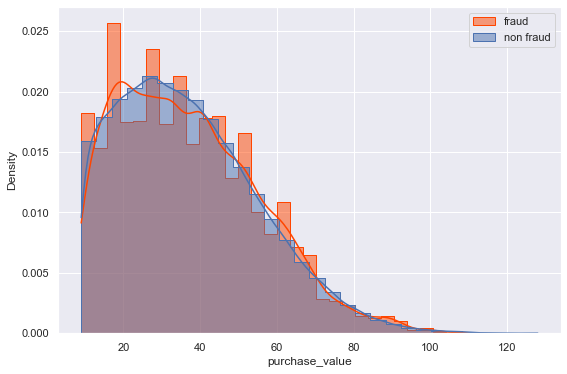

In [23]:
# We can try to plot 2 histograms with the fraud vs non fraud data vs concentration of purchase price - 
# it's possible that fraud purchases could be more or less expensive, showing a skew
# Done with regex - https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/

# A few comments on the params passed
# bins=30 - we choose a lower bin value so that the histogram is less 'spotty', won't affect kde anyways
# stat='density' - This normalizes the areas of both hisotgrams to 1, making them directly comparable
#           - (pct(%) or probability would result in the non fraud hist being notably smaller.) 
# kde - kernel density emulation helps us build an easily readable smoothed probabiltiy line, making the skew easy to see
# log_scale - the raw data is extremely skewed so logaritmic scaling helps make the significant data take up more space along the x-axis.
sns.histplot(df_clean[df_clean['is_fraud']==1]['purchase_value'], bins=30, stat='density', kde=True, element="step", label = 'fraud', color="orangered")
sns.histplot(df_clean[df_clean['is_fraud']==0]['purchase_value'], bins=30, stat='density', kde=True,  element="step", label = 'non fraud')
plt.legend()
plt.show()

In [24]:
# we can see that the distribution of purchase value for fraud and non fraud cases both have similar distribution curves,
# therefore, purchase value is inconclusive to test for fraudulent cases

# Another possibility is the time (in the df, 'days') of the purchase. It's possible that the fradulent cases have a different skew in purchase time

<AxesSubplot:xlabel='days', ylabel='Density'>

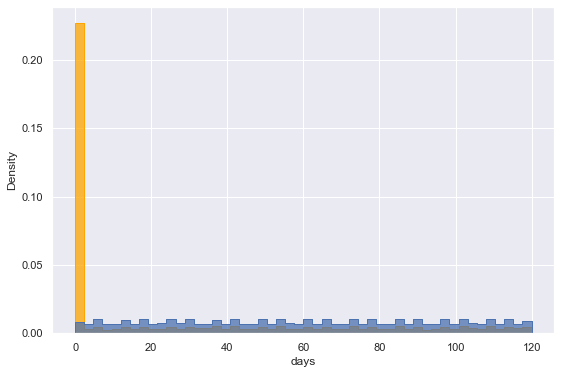

In [25]:
sns.histplot(df[df['is_fraud']==1]['days'],bins=50, stat='density',color="Orange", element="step")
sns.histplot(df[df['is_fraud']==0]['days'],bins=50, stat='density', element="step")

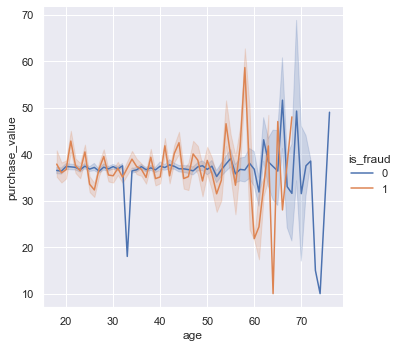

In [26]:
# correlation plt
sns.relplot(data=df, x='age', y='purchase_value', hue='is_fraud', kind='line')